# Market Basket Analysis in Python

**DQLab Fashion** adalah sebuah toko fashion yang menjual berbagai produk seperti jeans, kemeja, kosmetik, dan lain-lain. Walaupun cukup berkembang, namun dengan semakin banyaknya kompetitor dan banyak produk yang stoknya masih banyak tentunya membuat khawatir Pak Agus, manajer **DQLab Fashion**. Salah satu solusi adalah membuat paket yang inovatif. Dimana produk yang sebelumnya tidak terlalu laku tapi punya pangsa pasar malah bisa dipaketkan dan laku.

**Tujuan** :
* Mendapatkan insight top 10 dan bottom 10 dari produk yang terjual.
* Mendapatkan daftar seluruh kombinasi paket produk dengan korelasi yang kuat.
* Mendapatkan daftar seluruh kombinasi paket produk dengan item tertentu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
fashion = pd.read_csv('transaksi_dqlab_retail.tsv', sep='\t')
# print first five rows
fashion.head()

,Kode Transaksi,Nama Barang
0,#1,Kaos
1,#1,Shampo Biasa
2,#1,Sepatu Sport merk Z
3,#1,Serum Vitamin
4,#1,Baju Renang Pria Dewasa


In [3]:
# check dimension
print(f"DQLab Fashion Data terdiri dari {fashion.shape[0]} baris dan {fashion.shape[1]} kolom")

DQLab Fashion Data terdiri dari 33668 baris dan 2 kolom


In [4]:
# chcek info data
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kode Transaksi  33668 non-null  object
 1   Nama Barang     33668 non-null  object
dtypes: object(2)
memory usage: 526.2+ KB


Tidak ditemukan *missing values* dan format data sudah sesuai.

In [5]:
print("Jumlah transaksi unik adalah", fashion['Kode Transaksi'].nunique())

Jumlah transaksi unik adalah 3450


In [6]:
# cek jumlah produk dari transaksi
print("Jumlah produk unik adalah", fashion['Nama Barang'].nunique())

Jumlah produk unik adalah 69


In [7]:
print("Berikut ini adalah list produk yang telah terjual :")
fashion['Nama Barang'].unique()

Berikut ini adalah list produk yang telah terjual :


array(['Kaos', 'Shampo Biasa', 'Sepatu Sport merk Z', 'Serum Vitamin',
       'Baju Renang Pria Dewasa', 'Baju Renang Wanita Dewasa',
       'Baju Kaos Olahraga', 'Celana Jogger Casual', 'Dompet Card Holder',
       'Celana Jeans Sobek Wanita', 'Blouse Denim', 'Baju Batik Wanita',
       'Hair and Scalp', 'Minyak Rambut', 'Wedges Hitam',
       'Sepatu Sandal Anak', 'Tas Sekolah Anak Perempuan',
       'Baju Kemeja Putih', 'Dompet Flip Cover', 'Hair Tonic',
       'Baju Kaos Anak - Superheroes', 'Celana Pendek Casual',
       'Jeans Jumbo', 'Celana Pendek Jeans', 'Sepatu Sekolah Hitam W',
       'Tas Ransel Mini', 'Dompet Kulit Pria', 'Hair Dryer',
       'Flat Shoes Ballerina', 'Tas Sekolah Anak Laki-laki',
       'Cover Koper', 'Gembok Koper', 'Sweater Top Panjang', 'Tank Top',
       'Atasan Kaos Putih', 'Atasan Baju Belang', 'Shampo Anti Dandruff',
       'Tas Pinggang Wanita', 'Koper Fiber', 'Sepatu Sport merk Y',
       'Dompet STNK Gantungan', 'Cream Whitening', 'Celana Tactical

**Statistik Top 10**

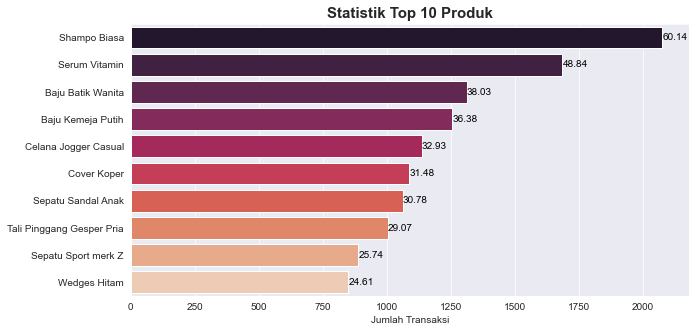

In [8]:
top_10 = fashion['Nama Barang'].value_counts()[:10]
plt.figure(figsize=(10,5))
ax1 = sns.barplot(x=top_10, y=top_10.index, palette='rocket')
for p1 in ax1.patches:
    ax1.annotate('{:.2f}'.format(p1.get_width()/fashion['Kode Transaksi'].nunique()*100), 
                 xy=(p1.get_width()+0.5, p1.get_y()+0.4),
                 ha='left', va='center', color= 'black')
ax1.set_title('Statistik Top 10 Produk', fontweight='bold', fontsize=15)
ax1.set_xlabel('Jumlah Transaksi')
plt.show()

**Statistik Bottom 10 Produk**

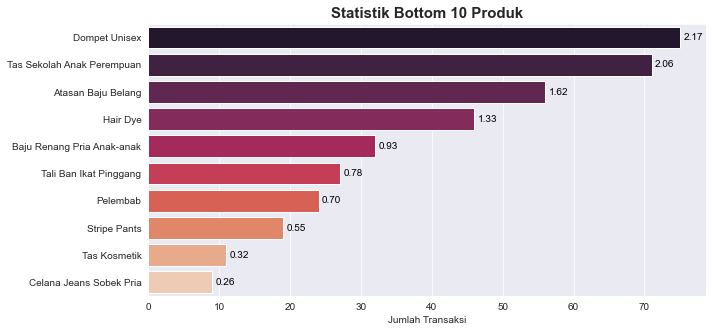

In [9]:
bottom_10 = fashion['Nama Barang'].value_counts()[-10:]
plt.figure(figsize=(10,5))
ax2 = sns.barplot(x=bottom_10, y=bottom_10.index, palette='rocket')
for p2 in ax2.patches:
    ax2.annotate('{:.2f}'.format(p2.get_width()/fashion['Kode Transaksi'].nunique()*100), 
                 xy=(p2.get_width()+0.5, p2.get_y()+0.4),
                 ha='left', va='center', color= 'black')
ax2.set_title('Statistik Bottom 10 Produk', fontweight='bold', fontsize=15)
ax2.set_xlabel('Jumlah Transaksi')
plt.show()

Insights :
* **Shampo Biasa** telah terjual sekitar 60,14% dari seluruh transaksi.
* Hanya 0,26% **Celana Jeans Sobek Pria** yang terdapat pada keseluruhan transaksi.

In [10]:
# grouping berdasarkan kode transaksi
data = fashion.groupby('Kode Transaksi')['Nama Barang'].unique()
data.head()

Kode Transaksi
#1       [Kaos, Shampo Biasa, Sepatu Sport merk Z, Seru...
#10      [Jeans Jumbo, Celana Pendek Jeans, Kaos, Baju ...
#100     [Hair Dryer, Shampo Biasa, Hair Tonic, Sepatu ...
#1000    [Celana Jeans Sobek Wanita, Celana Pendek Jean...
#1001    [Hair Dryer, Wedges Hitam, Sepatu Sport merk Z...
Name: Nama Barang, dtype: object

In [11]:
# cek total transaksi
list_transaksi = data.tolist()
len(list_transaksi)

3450

In [12]:
# Hitung banyak produk per transaksi dari semua transaksi
counts = [len(transaksi) for transaksi in list_transaksi]

# Hitung nilai tengah jumlah produk pada sebuah transaksi
print("Median number of items in a transaction is", int(np.median(counts)))

# Hitung nilai maksimum jumlah produk pada sebuah transaksi
print("Maximum number of items in a transaction is", np.max(counts))

Median number of items in a transaction is 10
Maximum number of items in a transaction is 22


## Encoding Transactions

In [13]:
# encoding produk pada sebuah list transaksi
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
data_encode = encoder.fit(list_transaksi).transform(list_transaksi)
df_encode = pd.DataFrame(data_encode, columns=encoder.columns_)
df_encode.head()

,Atasan Baju Belang,Atasan Kaos Putih,Baju Batik Wanita,Baju Kaos Anak - Karakter Kartun,Baju Kaos Anak - Superheroes,Baju Kaos Olahraga,Baju Kemeja Putih,Baju Renang Anak Perempuan,Baju Renang Pria Anak-anak,Baju Renang Pria Dewasa,...,Tas Multifungsi,Tas Pinggang Wanita,Tas Ransel Mini,Tas Sekolah Anak Laki-laki,Tas Sekolah Anak Perempuan,Tas Tangan,Tas Travel,Tas Waist Bag,Wedges Hitam,Woman Ripped Jeans
0,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [14]:
# Hitung support metric pada tiap kolom
df_encode.mean(axis=0)

Atasan Baju Belang                  0.016232
Atasan Kaos Putih                   0.118841
Baju Batik Wanita                   0.380290
Baju Kaos Anak - Karakter Kartun    0.121159
Baju Kaos Anak - Superheroes        0.115942
                                      ...   
Tas Tangan                          0.037101
Tas Travel                          0.220870
Tas Waist Bag                       0.161159
Wedges Hitam                        0.246087
Woman Ripped Jeans                  0.034203
Length: 69, dtype: float64

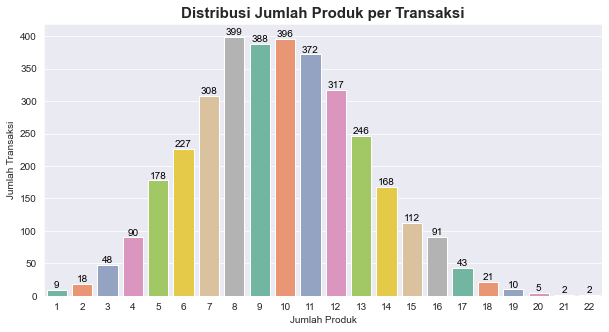

In [17]:
# Plotting distribution of product counts
distribusi = df_encode.sum(axis=1).value_counts().sort_index()
plt.figure(figsize=(10,5))
ax3 = sns.barplot(x=distribusi.index, y=distribusi, palette='Set2')
for p3 in ax3.patches:
    ax3.annotate('{:.0f}'.format(p3.get_height()), (p3.get_x()+0.4, p3.get_height()),
                 ha='center', va='bottom', color= 'black')
ax3.set_title('Distribusi Jumlah Produk per Transaksi', fontweight='bold', fontsize=15)
ax3.set_xlabel('Jumlah Produk')
ax3.set_ylabel('Jumlah Transaksi')
plt.show()

**Kombinasi Produk Menarik** :
* Memiliki asosiasi atau hubungan erat.
* Kombinasi produk minimal 2 item, dan maksimum 3 item.
* Kombinasi produk itu muncul setidaknya 10 dari dari seluruh transaksi.
* Memiliki tingkat confidence minimal 50 persen.

In [18]:
# setting transaksi berdasarkan kriteria menarik
df_transaksi = df_encode[df_encode.sum(axis=1) >= 2]
kriteria = 10 / len(list_transaksi)
kriteria

0.002898550724637681

## Apriori Algorithm

In [19]:
from mlxtend.frequent_patterns import apriori

frekuensi_itemset = apriori(df_transaksi, min_support=kriteria, max_len=3, use_colnames=True)
frekuensi_itemset

,support,itemsets
0,0.016274,(Atasan Baju Belang)
1,0.119151,(Atasan Kaos Putih)
2,0.380703,(Baju Batik Wanita)
3,0.121476,(Baju Kaos Anak - Karakter Kartun)
4,0.116245,(Baju Kaos Anak - Superheroes)
...,...,...
16214,0.006103,"(Tas Waist Bag, Tas Travel, Tas Sekolah Anak L..."
16215,0.008718,"(Wedges Hitam, Tas Travel, Tas Sekolah Anak La..."
16216,0.009300,"(Wedges Hitam, Tas Waist Bag, Tas Sekolah Anak..."
16217,0.012206,"(Tas Waist Bag, Wedges Hitam, Tas Travel)"


## Association Rules

In [20]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using metric lift
rules = association_rules(frekuensi_itemset, metric = 'lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Baju Batik Wanita),(Atasan Baju Belang),0.380703,0.016274,0.005522,0.014504,0.891208,-0.000674,0.998203
1,(Atasan Baju Belang),(Baju Batik Wanita),0.016274,0.380703,0.005522,0.339286,0.891208,-0.000674,0.937314
2,(Atasan Baju Belang),(Baju Kemeja Putih),0.016274,0.364720,0.004940,0.303571,0.832342,-0.000995,0.912198
3,(Baju Kemeja Putih),(Atasan Baju Belang),0.364720,0.016274,0.004940,0.013546,0.832342,-0.000995,0.997234
4,(Blouse Denim),(Atasan Baju Belang),0.182796,0.016274,0.003487,0.019078,1.172269,0.000512,1.002858
...,...,...,...,...,...,...,...,...,...
75439,"(Woman Ripped Jeans , Tas Travel)",(Wedges Hitam),0.006684,0.246731,0.003487,0.521739,2.114611,0.001838,1.575018
75440,"(Wedges Hitam, Tas Travel)",(Woman Ripped Jeans ),0.079628,0.034292,0.003487,0.043796,1.277125,0.000757,1.009939
75441,(Woman Ripped Jeans ),"(Wedges Hitam, Tas Travel)",0.034292,0.079628,0.003487,0.101695,1.277125,0.000757,1.024565
75442,(Wedges Hitam),"(Woman Ripped Jeans , Tas Travel)",0.246731,0.006684,0.003487,0.014134,2.114611,0.001838,1.007557


In [21]:
# pilih rules dengan nilai confindence 50% dan positif leverage
result = rules[(rules['confidence'] >= 0.5) & (rules['leverage'] > 0)] \
                .sort_values(by='lift', ascending=False)[:10]
result.reset_index(drop=True, inplace=True)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Tas Makeup, Tas Pinggang Wanita)",(Baju Renang Anak Perempuan),0.011915,0.036036,0.010462,0.878049,24.365854,0.010033,7.904505
1,"(Tas Makeup, Tas Travel)",(Baju Renang Anak Perempuan),0.012496,0.036036,0.010171,0.813953,22.587209,0.009721,5.181306
2,"(Tas Makeup, Tas Ransel Mini)",(Baju Renang Anak Perempuan),0.015402,0.036036,0.011334,0.735849,20.419811,0.010779,3.649292
3,"(Tas Pinggang Wanita, Sunblock Cream)",(Kuas Makeup ),0.023540,0.034292,0.016274,0.691358,20.160703,0.015467,3.128893
4,"(Tas Pinggang Wanita, Baju Renang Anak Perempuan)",(Tas Makeup),0.013078,0.040976,0.010462,0.800000,19.523404,0.009926,4.795118
5,"(Tas Ransel Mini, Baju Renang Anak Perempuan)",(Tas Makeup),0.014240,0.040976,0.011334,0.795918,19.423795,0.010750,4.699215
6,"(Baju Renang Anak Perempuan, Celana Pendek Gre...",(Tas Makeup),0.013078,0.040976,0.010171,0.777778,18.981087,0.009636,4.315606
7,"(Tas Makeup, Tas Waist Bag)",(Baju Renang Anak Perempuan),0.006393,0.036036,0.004359,0.681818,18.920455,0.004129,3.029601
8,"(Tas Makeup, Celana Pendek Green/Hijau)",(Baju Renang Anak Perempuan),0.015112,0.036036,0.010171,0.673077,18.677885,0.009627,2.948596
9,"(Sunblock Cream, Dompet Flip Cover)",(Kuas Makeup ),0.025865,0.034292,0.016274,0.629213,18.348505,0.015387,2.604484


Insights :

- Kombinasi **Tas Makeup dan Tas Pinggang Wanita terhadap Baju Renang Anak Perempuan** menghasilkan asosiasi atau hubungan yang paling erat dimana nilai confidence cukup tinggi diikuti metric lift.

## Slow Moving Product

Slow Moving Product adalah produk yang memiliki tingkat penjualan relatif lama karena bisa dipengaruhi musiman.

In [22]:
# Item slow moving berdasarkan top 3 rules
tas_makeup = rules[rules['consequents'] == {'Tas Makeup'}] \
             .sort_values(by='lift', ascending=False)[:3] 
baju_renang_pria = rules[rules['consequents'] == {'Baju Renang Pria Anak-anak'}] \
             .sort_values(by='lift', ascending=False)[:3]

In [23]:
slow_moving = pd.concat([tas_makeup, baju_renang_pria])
slow_moving

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26581,"(Tas Pinggang Wanita, Baju Renang Anak Perempuan)",(Tas Makeup),0.013078,0.040976,0.010462,0.800000,19.523404,0.009926,4.795118
26587,"(Tas Ransel Mini, Baju Renang Anak Perempuan)",(Tas Makeup),0.014240,0.040976,0.011334,0.795918,19.423795,0.010750,4.699215
26158,"(Baju Renang Anak Perempuan, Celana Pendek Gre...",(Tas Makeup),0.013078,0.040976,0.010171,0.777778,18.981087,0.009636,4.315606
26714,"(Gembok Koper, Tas Waist Bag)",(Baju Renang Pria Anak-anak),0.014821,0.009300,0.004069,0.274510,29.518382,0.003931,1.365560
26690,"(Flat Shoes Ballerina, Gembok Koper)",(Baju Renang Pria Anak-anak),0.021796,0.009300,0.004069,0.186667,20.072500,0.003866,1.218074
26655,"(Jeans Jumbo, Celana Jeans Sobek Wanita)",(Baju Renang Pria Anak-anak),0.045626,0.009300,0.005522,0.121019,13.013336,0.005097,1.127101


Insights :
* Terlihat pada item yang dipasangkan dengan **Tas Makeup** menghasilkan asosiasi atau hubungan yang cukup erat dimana nilai confidence yang tinggi diikuti metric lift. Selain itu dari ketiga rules yang terbentuk masing-masing terdapat produk **Baju Renang Anak Perempuan**. 
* Sedangkan item yang dipasangkan dengan **Baju Renang Pria Anak-anak** menghasilkan asosiasi atau hubungan yang tidak begitu erat dilihat dari nilai confidence yang rendah walaupun metric lift lebih tinggi.

## Kesimpulan
* Produk **Tas Makeup, Tas Pinggang Wanita, dan Baju Renang Anak Perempuan** dapat diletakkan di area atau rak yang berdekatan agar memudahkan pembeli mengambilnya.
* Produk **Tas Makeup, Tas Pinggang Wanita, dan Baju Renang Anak Perempuan** dapat dibuat promo diskon agar pembeli lebih tertarik membelinya.